# Compare and Comply

### Instalacion del paquete ibm watson para poder usar los servicios de ibm watson
Prala la instalacion se devera ejecutar la sigiente centencia

In [20]:
!pip3 install --upgrade "ibm-watson>=4.5.0"

Requirement already up-to-date: ibm-watson>=4.5.0 in /Users/edisonhuinaizaca/opt/anaconda3/lib/python3.7/site-packages (4.5.0)


## comprovacion de conectividad 
componentes nesesarios para la conecion del servicio
* version (obligatorio serie): Una fecha en formato AAAA-MM-DD que identifica la versión específica de la API a utilizar cuando se procesa la solicitud.
* file (obligatorio archivo): El archivo de entrada a clasificar.
* apikey(obligatorio archivo): es la clave de API que se encuentra en:
Captura de Pantalla 2020-07-22 a la(s) 15.27.17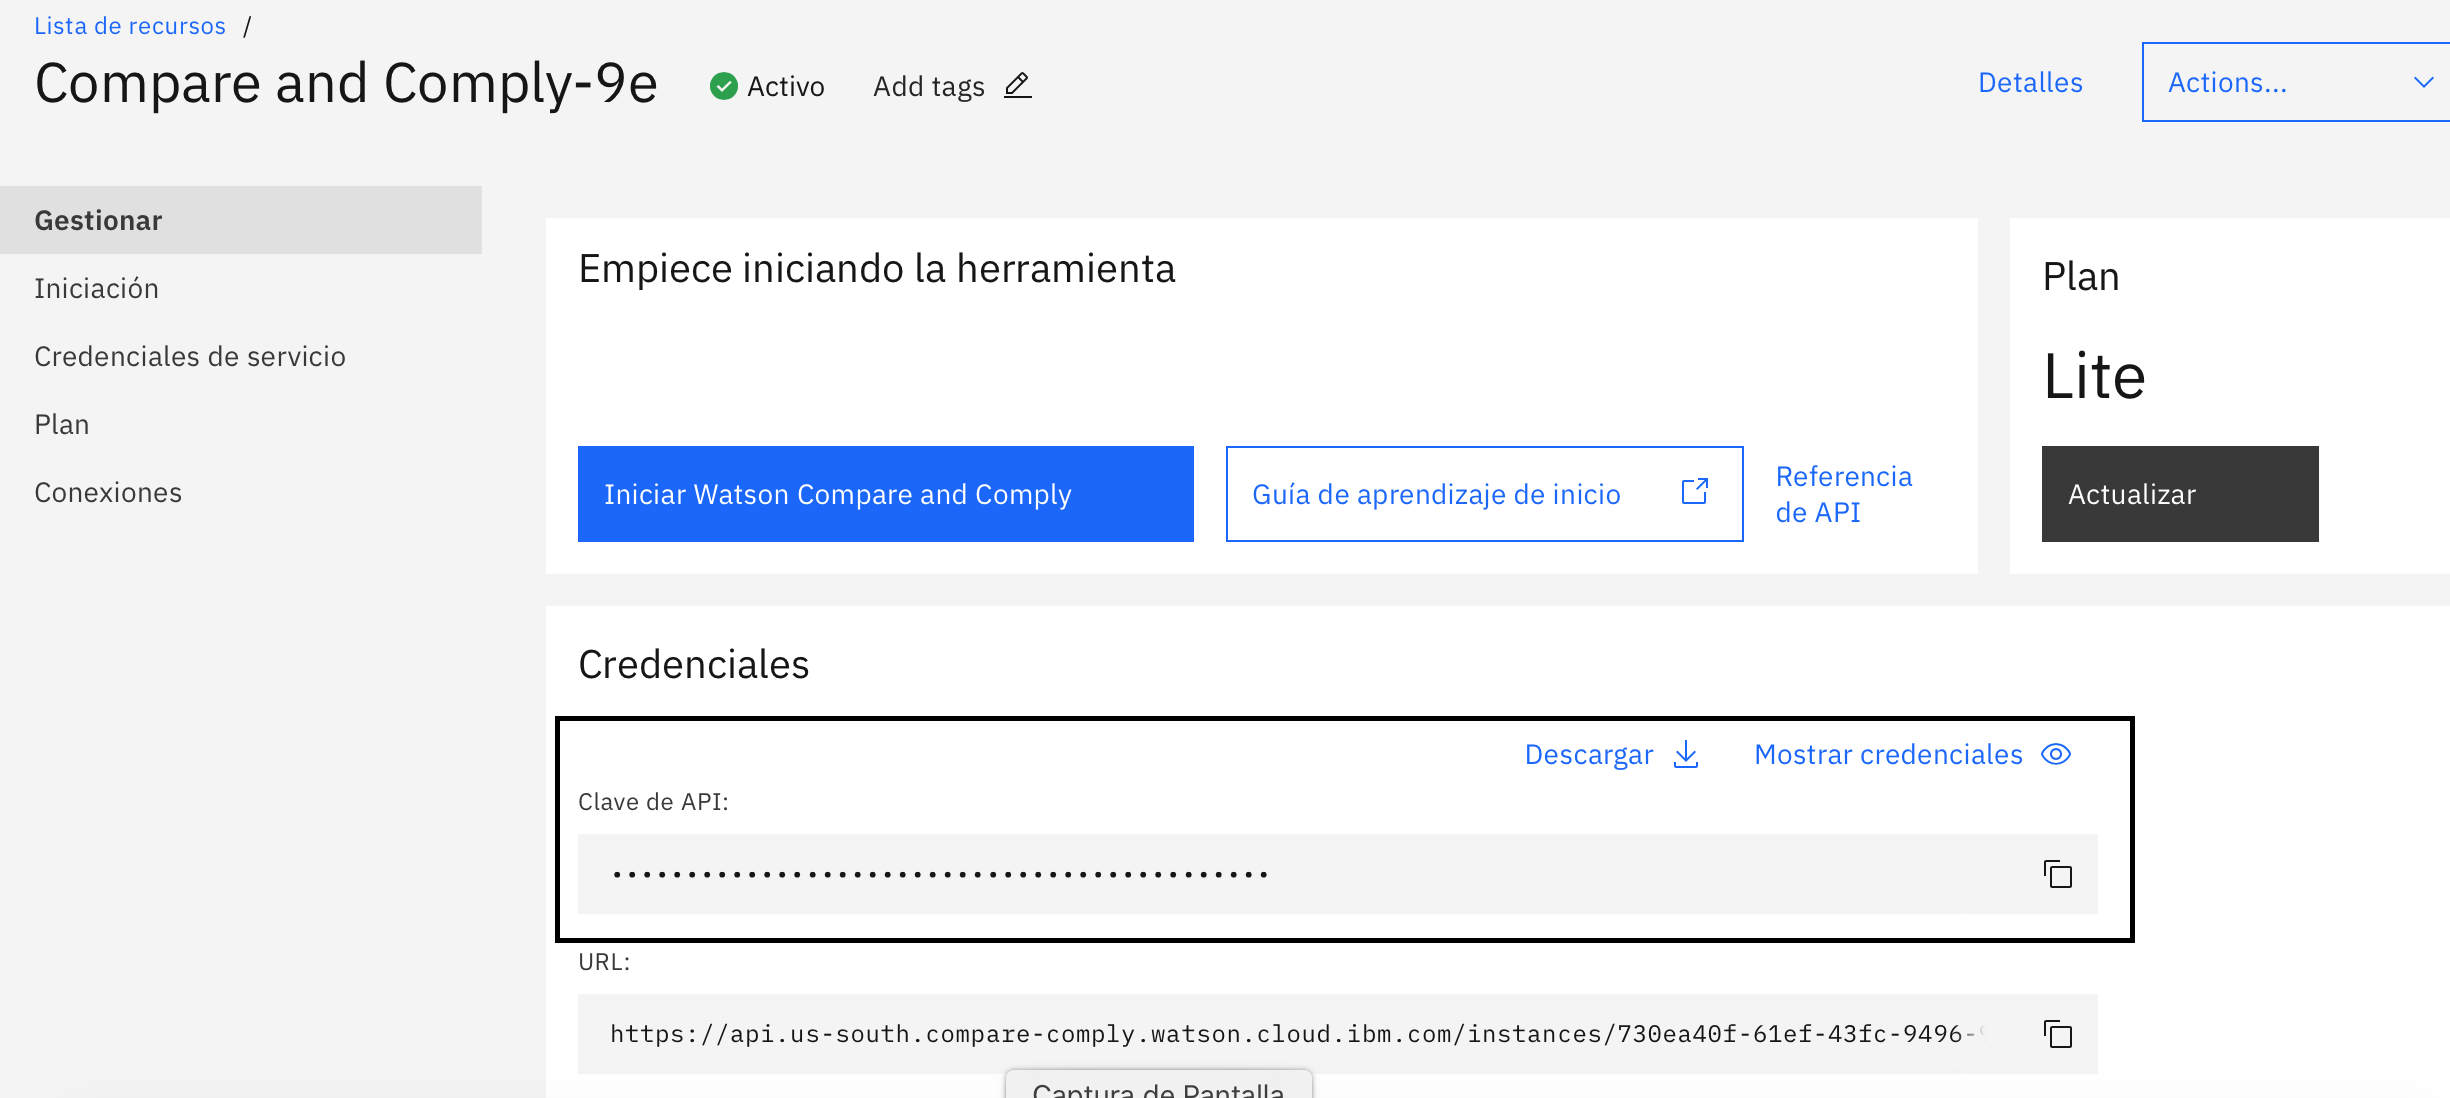
* input_file (obligatorio archivo):es la vía de acceso del archivo de entrada a analizar.

In [2]:
from ibm_watson import CompareComplyV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

authenticator = IAMAuthenticator('kB174lk637cymq9s7neG3D7jIPuEH1lb8ycozptb8RTU')
compare_comply = CompareComplyV1(
    version='4.5.0',
    authenticator=authenticator
)

compare_comply.set_service_url('https://api.us-south.assistant.watson.cloud.ibm.com/instances/c763be2c-d3ac-4c86-a130-ba8dffaffde6')

# Ejemplo 
Consumo de una appi de ibm watsom:


In [27]:
import json
from ibm_watson import LanguageTranslatorV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

authenticator = IAMAuthenticator('RFvyQmzLsEARxuDwDUZje_IulDVZsihjHnFKzBP75NEs')
language_translator = LanguageTranslatorV3(
    version='2018-05-01',
    authenticator=authenticator)
language_translator.set_service_url('https://api.us-south.language-translator.watson.cloud.ibm.com/instances/7d0c47a9-354d-4531-8bc6-5b12e601cb80')

## Translate
translation = language_translator.translate(
    text='Hello', model_id='es-en').get_result()
print(json.dumps(translation, indent=2, ensure_ascii=False))


{
  "translations": [
    {
      "translation": "Hello"
    }
  ],
  "word_count": 0,
  "character_count": 5
}


# Clasificacion de elementos
## parámetros
* abspath : Es la seccion donde se pondra la dreccion del documento
* file_content_type:Se espesifica el tipo, Los valores permitidos son: [ application/pdf, application/json, application/msword, application/vnd.openxmlformats-officedocument.wordprocessingml.document, image/bmp, image/gif, image/jpeg, image/png, image/tiff]
* classify_elements: es el metodo que va al ser usado para consumir la app 


In [3]:
import json
from os.path import abspath
from ibm_watson import CompareComplyV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

authenticator = IAMAuthenticator('Xt_eFVnNrmCK1CC7d7eVOSBupuHdfZUvrUebq8zn2BDC')
compare_comply = CompareComplyV1(
    version='2018-10-15',
    authenticator=authenticator
)

compare_comply.set_service_url('https://api.us-south.compare-comply.watson.cloud.ibm.com/instances/730ea40f-61ef-43fc-9496-9f53f0ac003d')

contract = abspath('/Users/edisonhuinaizaca/Desktop/CONTRATO.pdf')
with open(contract, 'rb') as file:
    result = compare_comply.classify_elements(file, file_content_type='application/pdf').get_result()
    print(json.dumps(result, indent=2))

{
  "document": {
    "title": "no title",
    "html": "<?xml version='1.0' encoding='UTF-8' standalone='yes'?><html>\n<head>\n    <meta content=\"text/html; charset=UTF-8\" http-equiv=\"Content-Type\"/><meta content=\"Est. Edisson Ezequiel Hui\u00f1aizaca Morales\" name=\"author\"/><meta content=\"2020-07-20\" name=\"publicationdate\"/><meta content=\"1\" name=\"numPages\"/><title>no title</title><style>/**/\n .Calibri_Black_12_0{font-size: 12.0pt; font-family: Calibri; color: Black; }\n/**/</style></head>\n<body><p text-alignment=\"left\"><span class=\"Calibri_Black_12_0\"><bbox height=\"6.0\" page=\"1\" width=\"232.06700897216797\" x=\"85.0250015258789\" y=\"76.280029296875\"> CONTRATO DE TRABAJO A PLAZO INDEFINIDO </bbox></span></p><p text-alignment=\"left\"><span class=\"Calibri_Black_12_0\"><bbox height=\"6.0\" page=\"1\" width=\"420.5909957885742\" x=\"85.0250015258789\" y=\"91.030029296875\">Comparecen, ante el sen\u0303or Inspector del Trabajo, por una parte................, a

## Organización del esquema
El esquema se organiza de la manera siguiente.

* document: Un objeto que enumera información básica sobre el documento, incluidos:
* title: El título del documento, si se detecta.
* html: El texto completo del documento de entrada en formato HTML.
* hash: El hash MD5 del documento de entrada.
* model_id: El modelo de análisis que va a utilizar el servicio. En el caso de los métodos /v1/element_classification y /v1/comparison, el valor predeterminado es contracts. Para el método /v1/tables, el valor predeterminado es tables. Estos valores predeterminados se aplican a los métodos autónomos y al uso de los métodos en las solicitudes de proceso por lotes.
* model_version: La versión del modelo de análisis especificado por el valor del parámetro model_id.

# Proceso de tablas

In [6]:
import json
from os.path import abspath
from ibm_watson import CompareComplyV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

authenticator = IAMAuthenticator('Xt_eFVnNrmCK1CC7d7eVOSBupuHdfZUvrUebq8zn2BDC')
compare_comply = CompareComplyV1(
    version='2018-10-15',
    authenticator=authenticator
)

compare_comply.set_service_url('https://api.us-south.compare-comply.watson.cloud.ibm.com/instances/730ea40f-61ef-43fc-9496-9f53f0ac003d')


table = abspath('/Users/edisonhuinaizaca/Desktop/CONTRATO.pdf')
with open(table, 'rb') as file:
    result = compare_comply.extract_tables(file).get_result()
    print(json.dumps(result, indent=2))

{
  "document": {
    "title": "no title",
    "html": "<?xml version='1.0' encoding='UTF-8' standalone='yes'?><html>\n<head>\n    <meta content=\"text/html; charset=UTF-8\" http-equiv=\"Content-Type\"/><meta content=\"Est. Edisson Ezequiel Hui\u00f1aizaca Morales\" name=\"author\"/><meta content=\"2020-07-21\" name=\"publicationdate\"/><meta content=\"1\" name=\"numPages\"/><title>no title</title><style>/**/\n .Arial_Black_10_0{font-size: 10.0pt; font-family: Arial; color: Black; } .Arial_Black_11_0{font-size: 11.0pt; font-family: Arial; color: Black; } .Arial_Black_12_0{font-size: 12.0pt; font-family: Arial; color: Black; } .Calibri_Black_12_0{font-size: 12.0pt; font-family: Calibri; color: Black; } .Arial_Black_15_0{font-size: 15.0pt; font-family: Arial; color: Black; } .Arial_Black_16_0{font-size: 16.0pt; font-family: Arial; color: Black; } .Arial_Black_24_0{font-size: 24.0pt; font-family: Arial; color: Black; } .Arial_Black_26_0{font-size: 26.0pt; font-family: Arial; color: Black;

## Esquema de salida
El esquema de salida del método es el siguiente. La salida del método Descripción de tablas especifica únicamente la información tabular que el método identifica en el documento de entrada.Ejemplo:
* tables: Una matriz que define las tablas identificadas en el documento de entrada.
* location: La ubicación de la tabla actual como la definen los desplazamientos begin (inicio) y end (fin) en el documento de entrada.
* text: Los contenidos textuales de la tabla actual del documento de entrada sin contenido de marcación asociado.
* section_title: Si se identifica, la ubicación de un título de sección contenido en la tabla actual. Aparece vacío si no se identifica ningún título de sección.
* text: El texto del título de sección identificado.
* location: La ubicación del título de sección en el documento de entrada como lo definen los índices begin y end.
* title: Si se identifica, el título de la tabla actual con el formato Table x.: .... Está vacío cuando no se identifica ningún título. Cuando se expone, title también se excluye de la matriz contexts de la misma tabla.
* text: El texto del título de tabla identificado.
* table_headers: Una matriz de las celdas a nivel de tabla aplicables como cabeceras al resto de celdas de la tabla actual. Cada cabecera de tabla se define como una colección de los elementos siguientes:


# comparacion de dos documetos

## parámetros
### archivo_1

* El primer documento para comparar.

### archivo_2

* El segundo documento para comparar.

### file_1_content_type

* El tipo de contenido del archivo_1.

* Los valores permitidos: [ application/pdf, application/json, application/msword, application/vnd.openxmlformats-officedocument.wordprocessingml.document, image/bmp, image/gif, image/jpeg, image/png, image/tiff]

### file_2_content_type

* El tipo de contenido del archivo_2.

* Los valores permitidos: [ application/pdf, application/json, application/msword, application/vnd.openxmlformats-officedocument.wordprocessingml.document, image/bmp, image/gif, image/jpeg, image/png, image/tiff]

### file_1_label

Una etiqueta de texto para el primer documento.


In [2]:
import json
from os.path import abspath
from ibm_watson import CompareComplyV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

authenticator = IAMAuthenticator('Xt_eFVnNrmCK1CC7d7eVOSBupuHdfZUvrUebq8zn2BDC')
compare_comply = CompareComplyV1(
    version='2018-10-15',
    authenticator=authenticator
)

compare_comply.set_service_url('https://api.us-south.compare-comply.watson.cloud.ibm.com/instances/730ea40f-61ef-43fc-9496-9f53f0ac003d')

with open(abspath('/Users/edisonhuinaizaca/Desktop/doc.pdf'), 'rb') as file1, open(abspath('/Users/edisonhuinaizaca/Desktop/doc2.pdf'), 'rb') as file2:
    result = compare_comply.compare_documents(file1, file2).get_result()
print(json.dumps(result, indent=2))

{
  "model_version": "1.2.1",
  "documents": [
    {
      "html": "<?xml version='1.0' encoding='UTF-8' standalone='yes'?><html>\n<head>\n    <meta content=\"text/html; charset=UTF-8\" http-equiv=\"Content-Type\"/><meta content=\"Est. Edisson Ezequiel Hui\u00f1aizaca Morales\" name=\"author\"/><meta content=\"2020-07-22\" name=\"publicationdate\"/><meta content=\"1\" name=\"numPages\"/><title>no title</title><style>/**/\n .Calibri_Black_12_0{font-size: 12.0pt; font-family: Calibri; color: Black; }\n/**/</style></head>\n<body><p text-alignment=\"left\"><span class=\"Calibri_Black_12_0\"><bbox height=\"6.0\" page=\"1\" width=\"226.80201721191406\" x=\"185.5800018310547\" y=\"76.280029296875\">CONTRATO DE TRABAJO A PLAZO INDEFINIDO </bbox></span><span class=\"Calibri_Black_12_0\"><bbox height=\"6.0\" page=\"1\" width=\"420.5909957885742\" x=\"85.0250015258789\" y=\"91.030029296875\">Comparecen, ante el sen\u0303or Inspector del Trabajo, por una parte................, a trave\u0301s de </

# Rsultado 
### model_id
El modelo de análisis utilizado para comparar los documentos de entrada. Para el método Comparar dos documentos , el único valor válido es contracts.
### version_modelo
La versión del modelo de análisis identificado por el valor de la model_idclave.
### documentos
Lista [Documento]
Lista [Documento]
Información sobre los documentos que se comparan.
### idéntico_texto

Especifica si el elemento alineado es idéntico. Los elementos se consideran idénticos a pesar de las pequeñas diferencias, como la puntuación inicial, la puntuación al final de la oración, los espacios en blanco, la presencia o ausencia de artículos definidos o indefinidos, y otros.Ejemplo
Captura de Pantalla 2020-07-22 a la(s) 14.39.21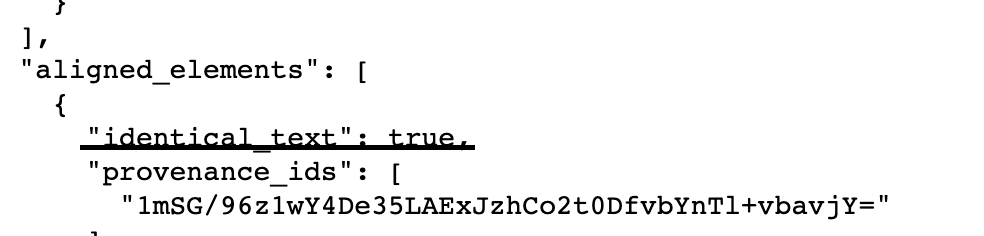
# ejemplos github
https://github.com/watson-developer-cloud/python-sdk

# Conclusion 
Esta heramienta es muy util para comparar contratos ,clasificar y extraer de tablas para su mejor comprencion
